# Spectroscopy of a three 2D cavity system 

1. **Introduction**
2. **Problem parameters**
3. **Setting up the operators and the Hamiltonian's**
4. **Computing and plotting the eigenfrequencies of the coupled system**

<u>Author</u> : Soumya Shreeram (shreeramsoumya@gmail.com)<br>
<u>Supervisor</u> : Yu-Chin Chao (ychao@fnal.gov) <br>
<u>Date</u>$\ \ \ \$: July 2019<br>

This script was coded as part of the Helen Edwards Summer Internship program at Fermilab.

The hamiltonian for such a system with two qubits with frequencies $v_{Q,1}$, $v_{Q,2}$, and $n$ mode filter can be described as,

$$ \hat{H}_{F} = \sum_{i=1}^{n}h\ v_{F}\ \hat{a}^{\dagger}_i \hat{a}_i +  \sum_{i=2}^{n}h\ g_{F}\ (\hat{a}^{\dagger}_i \hat{a}_{i-1} + \hat{a}^{\dagger}_{i-1} \hat{a}_i)$$

where $\hat{a}_i$ creates a photon in the $i^{th}$ resonantor, and $g_F$ is the filter-filter coupling.

The code calculates the eigen modes for such a system for a range of frequencies.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
from math import pi
from qutip import *

## 2. Problem parameters

In [21]:
"""------------- FREQUENCIES --------------------"""
w_f = 2*pi*7.1      # Resonator/ Filter frequency

"""------------- COUPLING --------------------"""
g_f1 = 2*pi*0.118    # Filter-filter coupling
g_f2 = 2*pi*0.344 

numF = 3            # number of filters
N = 2               # number of fock states 

kappa = 1.0/0.129   # cavity dissipation rate
n_th_a = 0.063      # avg. no. of thermal bath excitation
r1 = 0.0075           # qubit relaxation rate
r2 = 0.0025           # qubit dephasing rate

times = np.linspace(0,100,800)

## 3. Setting up the operators and the Hamiltonian's

In [22]:
def numOp(m):
  """
  Computes the number operator 
  @param loweringMat :: lowering matrix operator for a system
  """
  return m.dag()*m

def rwaCoupling(m1, m2):
    return m1.dag()*m2 + m1*m2.dag()

In [26]:
# cavity 1, 2, 3 destruction operators
a1 = tensor(destroy(N), qeye(N), qeye(N))
a2 = tensor(qeye(N), destroy(N), qeye(N))
a3 = tensor(qeye(N), qeye(N), destroy(N))

# Filter Hamiltonians (refer formula in the Introduction)
Hf = numOp(a1) + numOp(a2) + numOp(a3)    
H_f12 = g_f1*(rwaCoupling(a1, a2) + rwaCoupling(a2, a3))
 
H = w_f*Hf + H_f12 # Resultant Hamiltonian

# collapse operators
c_ops = []

In [29]:
def compute(w_qList, H, N):
  """
  Computes the Eigen-vales and states for a given qubit frequency
  @param w_qList :: range of qubit frequencies
  @param H_q1 :: Qubit 1 independent Hamiltonian 
  @param N :: Number of Fock states
  @param sz1 :: z matrix for qubit 1
  """
  evals_mat = np.zeros((len(w_qList), 8))
  for i, w_qi in enumerate(w_qList):
    evals, evecs = H.eigenstates()
    evals_mat[i,:] = evals
  return evals_mat

## 4. Computing and plotting the eigenfrequencies of the coupled system

In [30]:
# range of qubit 1 frequencies
w_q1List = np.linspace(5,7.2,100)*2*pi

evals_mat = compute(w_q1List, H, N)

Text(0.5, 1.0, 'Energy Spectrum for 3 cavities')

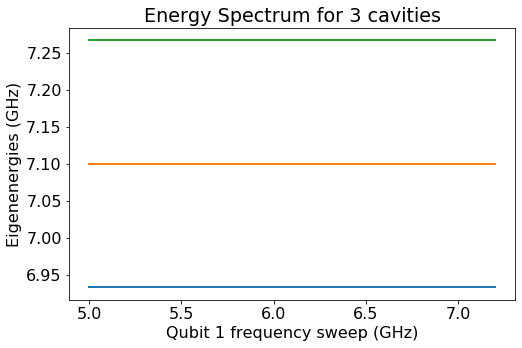

In [31]:
fig,ax = plt.subplots(figsize=(8,5))

for n in [1, 2, 3]:
  ax.plot(w_q1List / (2 * pi), (evals_mat[:, n] - evals_mat[:, 0])/ (2 * pi), lw=2)
ax.set_xlabel('Qubit 1 frequency sweep (GHz)')
#ax.set_ylim([6.99,7.001])
ax.set_ylabel('Eigenenergies (GHz)')
ax.set_title('Energy Spectrum for 3 cavities')